# Q2

pg15-19

In [27]:
pi.fun <- function(i){
      out <- 0
      if(i > 1) out <- 1/(i+1)^3
      out
}

In [28]:
N <- 20000
X <- numeric(N)
current.state <- 50 # initialize the markov chain

for (n in 1:N){
      i <- current.state
      P <- c(min( pi.fun(i-2) / pi.fun(i), 1),
            min( pi.fun(i-1) / pi.fun(i), 1),
            min( pi.fun(i+1) / pi.fun(i), 1),
            min( pi.fun(i+2) / pi.fun(i), 1)) / 6
      P0 <- 1 - sum(P)
      P <- c(P[1:2], P0, P[3:4])
      transition <- sample(seq(-2,2,1), size = 1, prob = P)
      current.state <- current.state + transition
      X[n] <- current.state
}

In [29]:
n <- 1000
observedDist <- table(X[-c(1:n)])
observedDist/(N-n)


           2            3            4            5            6            7 
4.773684e-01 2.082632e-01 1.075263e-01 6.442105e-02 3.889474e-02 2.321053e-02 
           8            9           10           11           12           13 
1.642105e-02 1.347368e-02 9.421053e-03 8.578947e-03 7.631579e-03 5.157895e-03 
          14           15           16           17           18           19 
4.105263e-03 3.000000e-03 2.157895e-03 1.947368e-03 2.157895e-03 1.947368e-03 
          20           21           22           23 
1.894737e-03 1.210526e-03 1.157895e-03 5.263158e-05 

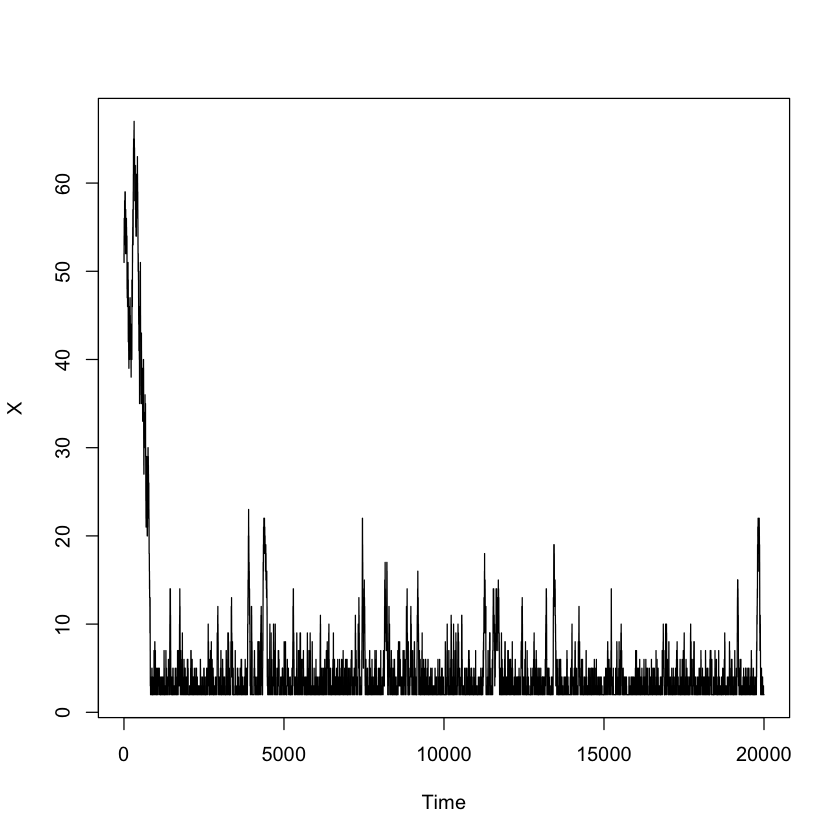

In [30]:
ts.plot(X)

In [31]:
# estimate K
# pi2 <- k/(2+1)^3 = k/27
k <- observedDist[2]/19000*27
k

3 
5.623105

# Q5

Re-run the MCMC example from above(Q4), using a starting value of 625 and a λ value of 1/625.

Adjust the scale so that you get an acceptance rate of around 40%. How does the posterior distribution look now

In [32]:
# install.packages('LearnBayes')
library('LearnBayes')

### Original code for Q4


In [33]:

logNormExp <- function(sigma2, datapar) { 
      X <- datapar$data 
      lambda <- datapar$lambda
      loglike <- dnorm(X, sd=sqrt(abs(sigma2)), log = TRUE)
      logprior <- dexp(sigma2, rate = lambda, log = TRUE) 
      return(loglike + logprior)
}

data <- -25 
start <- matrix(300, nrow=1)  #using a starting value of 625
datapar <- list(data=data, lambda=1/10)

m <- 10000 
varcov <- matrix(1, nrow=1) 
proposal <- list(var=varcov, scale = 50)

s <- rwmetrop(logNormExp, proposal, start, m, datapar)

cat("The acceptance rate should be an intermediate value:", s$accept)

The acceptance rate should be an intermediate value: 0.3783

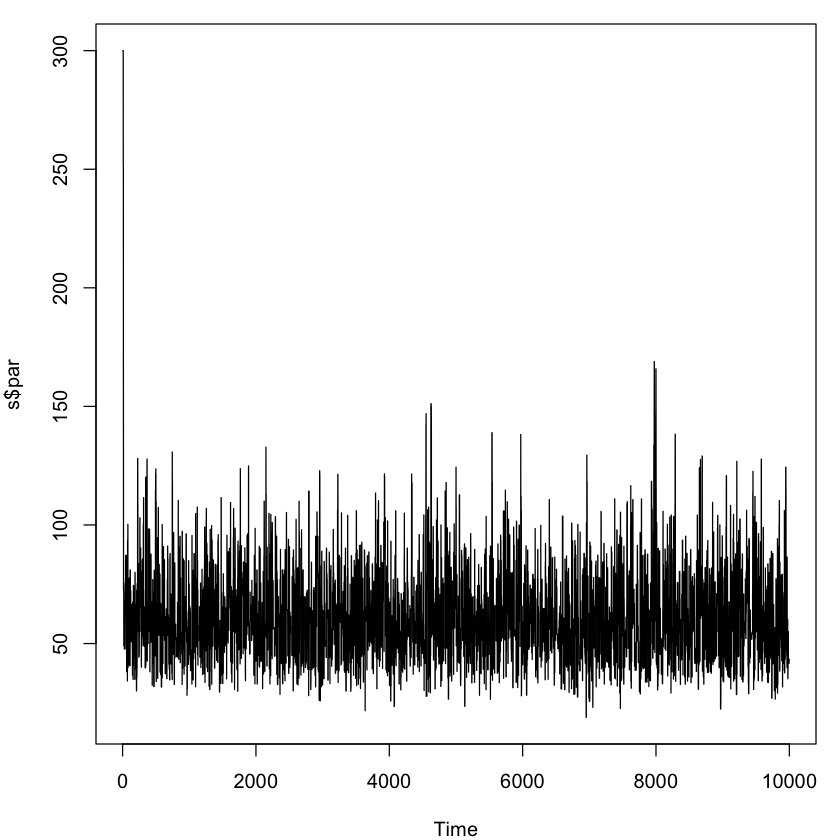

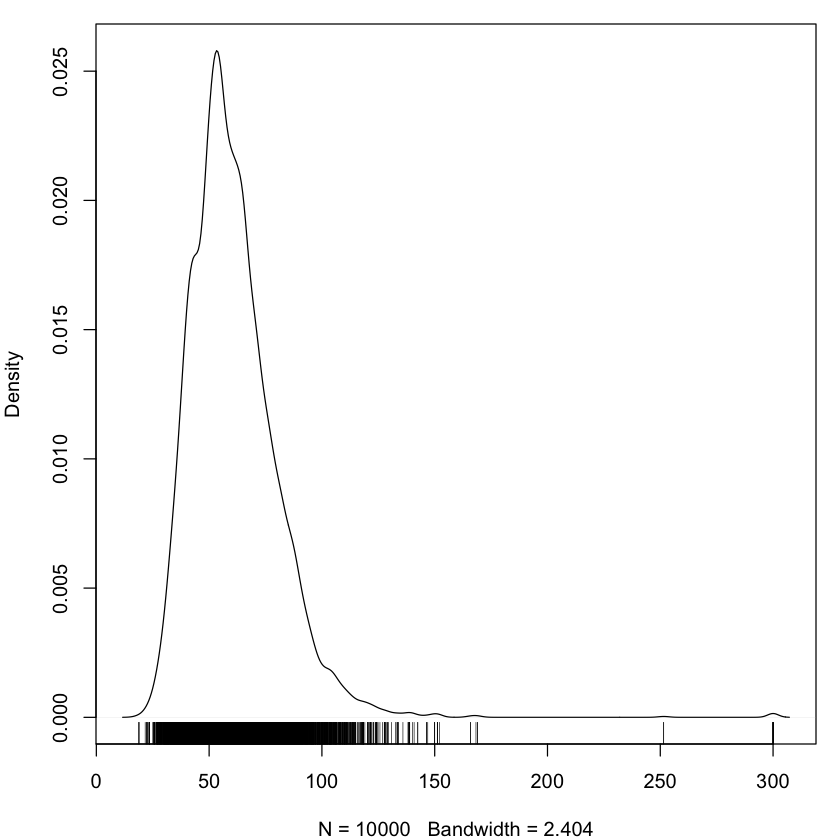

In [34]:
par(mar=c(4, 4, 1, 1)) 
ts.plot(s$par)

par(mar=c(4, 4, 1, 1)) 
plot(density(s$par), main = " ") 
rug(s$par)

### Change the start=625 and theta=1/625

In [35]:
library(LearnBayes)

logNormExp <- function(sigma2, datapar) { 
      X <- datapar$data 
      lambda <- datapar$lambda
      loglike <- dnorm(X, sd=sqrt(abs(sigma2)), log = TRUE)
      logprior <- dexp(sigma2, rate = lambda, log = TRUE) 
      return(loglike + logprior)
}

data <- -25 
start <- matrix(625, nrow=1)  #using a starting value of 625
datapar <- list(data=data, lambda=1/625)

m <- 10000 
varcov <- matrix(1, nrow=1) 
proposal <- list(var=varcov, scale = 1075) # Adjust the scale so that you get an acceptance rate of around 40%

s <- rwmetrop(logNormExp, proposal, start, m, datapar)

cat("The acceptance rate should be an intermediate value:", s$accept)

The acceptance rate should be an intermediate value: 0.3941

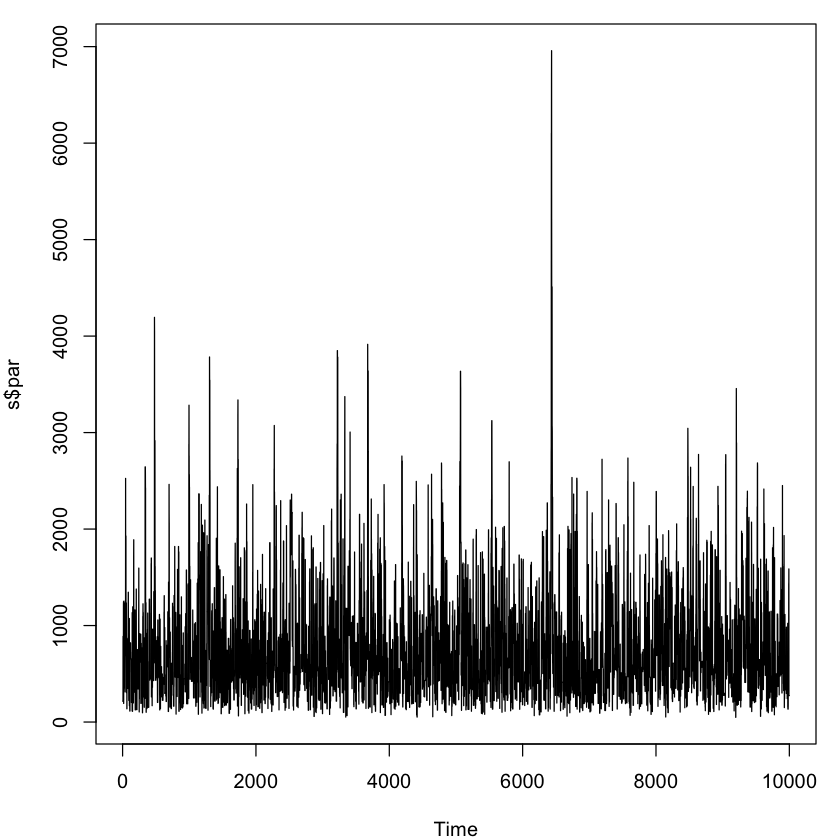

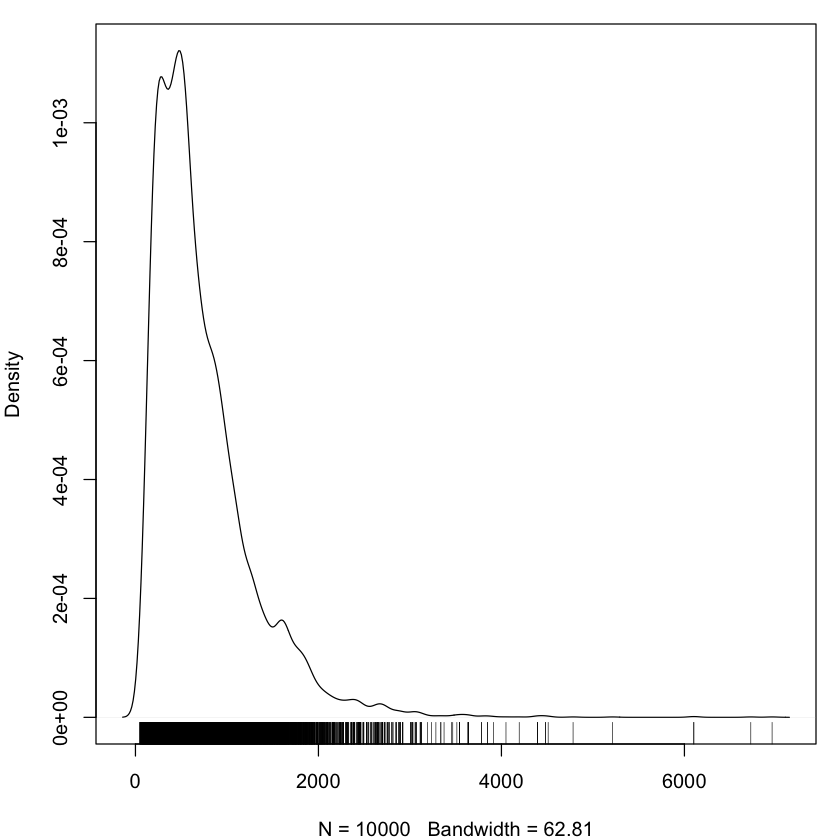

In [36]:
par(mar=c(4, 4, 1, 1)) 
ts.plot(s$par)

par(mar=c(4, 4, 1, 1)) 
plot(density(s$par), main = " ") 
rug(s$par)

# Q6(part g)

### part a

In [37]:
# 1. 40 states in the state space
# 2. the 11th space corresponds to “Jail
# 3. the 31st space corresponds to “Go to Jail”
# 4. hits space 31, the probability is 1 that the player moves to space 11 at the next move

MoveProbs <- c(0, 1:6, 5:1)/36      # probability of the number which can get from two dices [0,1,2,3,4,5,6,7,8,9,10,11,12]
                                    # 0,1: is impossible as the minimum number of moves is 2
                                    # 2: [1,1]              1 time
                                    # 3: [1,2] or [2,1]     2 times 
                                    # ...
                                    # 12: [12,12]           1 time
                                    # so on....

P <- matrix(0, nrow=40, ncol=40)    

for(i in 1:40){
      P[i, ((i-1) + 1:12)%%40+1 ] <- MoveProbs
}

P[31, ] <- rep(0, 40)               # refresh the probability
P[31, 11] <- 1                      # hits space 31, the probability is 1 that the player moves to space 11 at the next move
P[, 1:9]

0.00000000,0.00000000,0.02777778,0.05555556,0.08333333,0.11111111,0.13888889,0.16666667,0.13888889
0.00000000,0.00000000,0.00000000,0.02777778,0.05555556,0.08333333,0.11111111,0.13888889,0.16666667
0.00000000,0.00000000,0.00000000,0.00000000,0.02777778,0.05555556,0.08333333,0.11111111,0.13888889
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02777778,0.05555556,0.08333333,0.11111111
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02777778,0.05555556,0.08333333
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02777778,0.05555556
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.02777778
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


### part b


Find the long-run distribution for this Markov chain, calling the resulting state vector PI.

Use names(PI) <- 1:40 to attach names to the vector, and display the probabilities with a bar plot. 

Which space is second-most frequently visited? How often is space 40 visited?

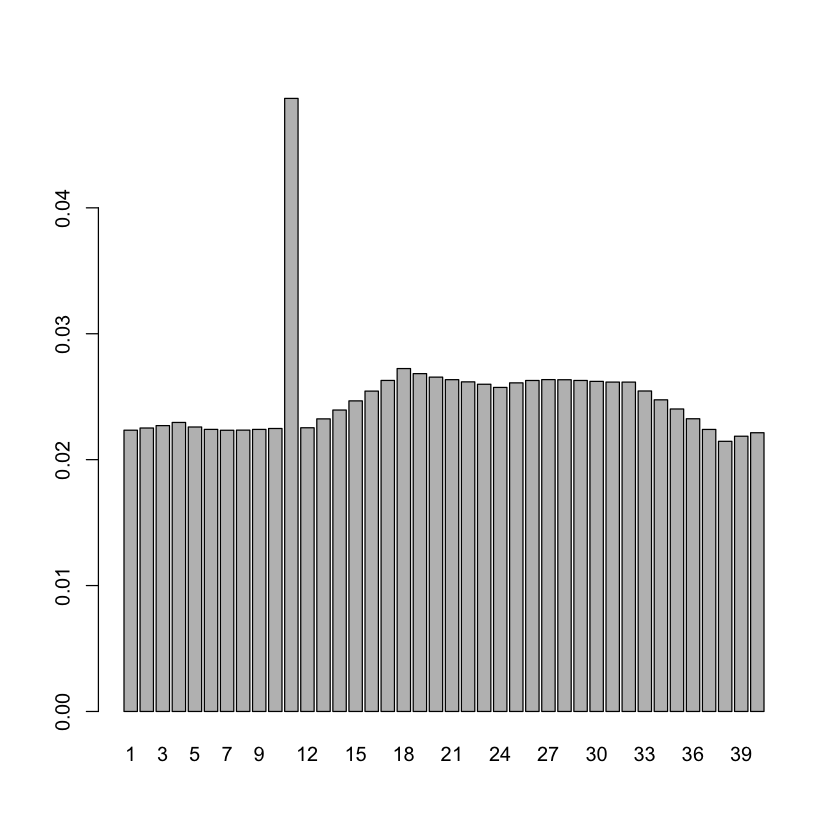

In [38]:
# stationary MC Lec7-pg12 
tP <- rbind(diag(40) - t(P), rep(1, 40)) # transpose P and augment with extra 40 units
RHS <- c(rep(0, 40), 1)
PI <- qr.solve(tP, RHS)
names(PI) <- 1:40
barplot(PI)

When x-axis at 11, the probability is much larger.

### part c

Suppose you have built hotels on spaces 17, 19 and 20, and you can receive revenue of $950, $950 and $1000 for each time that your opponent lands on these spaces. 

Calculate the long run average amount of revenue (per turn) that you could obtain from your opponent?

In [39]:
Revenue <- numeric(40)
Revenue[17] <- 950
Revenue[19] <- 950
Revenue[20] <- 1000
ERevenue <- sum(Revenue*PI)
cat("The expected value is", ERevenue)

The expected value is 77.02148

### part d

Suppose your opponent has built hotels on spaces 38 and 40, and it will cost you $1500 and $2000 each time you land on one of these spaces. 

Calculate the long run average cost per turn. 

By subtraction, you can find the expected profit per turn for someone who owns hotels on spaces 17, 19 and 20 while playing against someone with hotels on spaces 38 and 40

In [40]:
Cost <- numeric(40)
Cost[38] <- 1500
Cost[40] <- 2000
ECost <- sum(Cost*PI)
cat("The expected cost is", ECost)

The expected cost is 76.4601

In [41]:
cat("Subtracting the expected cost from expected revenue gives the expected profit:", ERevenue - ECost)

Subtracting the expected cost from expected revenue gives the expected profit: 0.5613799

### part e

Calculate the long run variance of your costs and of your revenues. 

Add these variances together to obtain the variance of your profit. 

Finally, take the square root to obtain the standard deviation of your profit. 

Interpret your results.

In [42]:
VRevenue <- sum(Revenue^2*PI) - sum(Revenue*PI)^2     # variance of revenue
VCost <- sum(Cost^2*PI) - sum(Cost*PI)^2              # variance of cost
VProfit <- VRevenue + VCost                           # variance of profit
SDProfit <- sqrt(VProfit)                             # sd dev of profit
cat("The standard deviation of the profit is:", SDProfit)

The standard deviation of the profit is: 446.7071

Comparing to the expected profit, the SDProfit is way too large.

It means there is no real advantage to either player, and that the outcome (who wins or loses), when these opposing strategies are employed. 

We can tell it's highly unpredictable.

### part f

Repeat the previous three exercises, under the assumption that you additionally have built hotels on spaces 22, 24 and 25 and can generate revenue $1050, $1050, and $1100 at these locations, 

and your opponent has additionally built hotels on spaces 32, 33 and 35 which will cost you $1275, $1275 and $1400 when you land on those spaces

In [43]:
Revenue[22] <- 1050
Revenue[24] <- 1050
Revenue[25] <- 1100

Cost[32] <- 1275
Cost[33] <- 1275
Cost[35] <- 1400

ERevenue <- sum(Revenue*PI)
ECost <- sum(Cost*PI)
VRevenue <- sum(Revenue^2*PI) - sum(Revenue*PI)^2     # variance of revenue
VCost <- sum(Cost^2*PI) - sum(Cost*PI)^2              # variance of cost
VProfit <- VRevenue + VCost                           # variance of profit
SDProfit <- sqrt(VProfit)                             # sd dev of profit
cat("The standard deviation of the profit is:", SDProfit)

The standard deviation of the profit is: 611.9753

### part g

Under the assumptions of (c) and (d), write code that will simulate concurrent Markov chains for you and your opponent, both starting in space 1, with both starting with a cash surplus of $5000, and ending when the first person loses all of their cash. 

Run this simulation 1000 times, and estimate the probability that you would win. 

Re-run the simulation 1000 times under the assumptions in (f), and estimate the probability that you would win.

In [44]:
# Set the number of simulations
n_simulations <- 1000
# Set the starting cash surplus for both players
starting_cash <- 5000
# Set the number of spaces
n_spaces <- 40
# Set the initial positions for both players to space 1
position1 <- 1
position2 <- 1
# Set the cash balances for both players to the starting cash surplus
cash1 <- starting_cash
cash2 <- starting_cash
# Set up a vector to store the results of the simulations
results <- rep(0, n_simulations)

### Run the simulation n_simulations times by part c & d

In [45]:
# Run the simulation n_simulations times
for(i in 1:n_simulations){
  # Set the positions of both players to space 1 at the start of each simulation
  position1 <- 1
  position2 <- 1
  # Set the cash balances of both players to the starting cash surplus at the start of each simulation
  cash1 <- starting_cash
  cash2 <- starting_cash
  # Set a flag to indicate whether the simulation has ended
  game_over <- FALSE
  
  
  # Run the simulation until one player loses all of their cash or both players have no more cash left
  while(!game_over){
      
      # Roll the dice for player 1
      dice1 <- sample(1:12, size = 1)
      # Calculate player 1's new position
      position1 <- ((position1 - 1) + dice1)%%n_spaces + 1
      
      # Check if player 1 landed on a space with a hotel
      if(position1 %in% c(17, 19, 20)){
        # Player 1 landed on a space with a hotel, so they receive revenue
        cash1 <- cash1 + Revenue[position1]
      } else if(position1 %in% c(38, 40)){
        # Player 1 landed on a space with an opponent's hotel, so they pay a cost
        cash1 <- cash1 - Cost[position1]
      }
      
      # Roll the dice for player 2
      dice2 <- sample(1:12, size = 1)
      # Calculate player 2's new position
      position2 <- ((position2 - 1) + dice2)%%n_spaces + 1
      # Check if player 2 landed on a space with a hotel
      if(position2 %in% c(17, 19, 20)){
        # Player 2 landed on a space with a hotel, so they receive revenue
        cash2 <- cash2 + Revenue[position2]
      } else if(position2 %in% c(38, 40)){
        # Player 2 landed on a space with an opponent's hotel, so they pay a cost
        cash2 <- cash2 - Cost[position2]
      }
      
      # Check if either player has lost all of their cash
      if(cash1 <= 0 || cash2 <= 0){
        # One player has lost all of their cash, so the simulation ends
        game_over <- TRUE
        
        # Check which player won
        if(cash1 > 0){
          # Player 1 won
          results[i] <- 1
        } else {
          # Player 2 won
          results[i] <- 0
          }
      }
  }
}

In [46]:
# Calculate the probability that player 1 wins
prob_win <- mean(results)

# Print the probability of winning
cat("This code calculates the mean of the results vector, which will be:\n
- 1 if player 1(me) won \n
- 0 if player 2(opponent) won. \n
- The mean of this vector will be the probability that player 1(me) wins.\n")
cat("The probability of winning is:", prob_win)

This code calculates the mean of the results vector, which will be:

- 1 if player 1(me) won 

- 0 if player 2(opponent) won. 

- The mean of this vector will be the probability that player 1(me) wins.
The probability of winning is: 0.488

### Run the simulation n_simulations times by part f

In [47]:
for(i in 1:n_simulations){
  # Set the positions of both players to space 1 at the start of each simulation
  position1 <- 1
  position2 <- 1
  # Set the cash balances of both players to the starting cash surplus at the start of each simulation
  cash1 <- starting_cash
  cash2 <- starting_cash
  # Set a flag to indicate whether the simulation has ended
  game_over <- FALSE
  

  # Run the simulation until one player loses all of their cash or both players have no more cash left
  while(!game_over){
      
      # Roll the dice for player 1
      dice1 <- sample(1:12, size = 1)
      # Calculate player 1's new position
      position1 <- ((position1 - 1) + dice1)%%n_spaces + 1
      
      # Check if player 1 landed on a space with a hotel
      if(position1 %in% c(22, 24, 25)){
        # Player 1 landed on a space with a hotel, so they receive revenue
        cash1 <- cash1 + Revenue[position1]
      } else if(position1 %in% c(32, 33, 35)){
        # Player 1 landed on a space with an opponent's hotel, so they pay a cost
        cash1 <- cash1 - Cost[position1]
      }
      
      # Roll the dice for player 2
      dice2 <- sample(1:12, size = 1)
      # Calculate player 2's new position
      position2 <- ((position2 - 1) + dice2)%%n_spaces + 1
      # Check if player 2 landed on a space with a hotel
      if(position2 %in% c(22, 24, 25)){
        # Player 2 landed on a space with a hotel, so they receive revenue
        cash2 <- cash2 + Revenue[position2]
      } else if(position2 %in% c(32, 33, 35)){
        # Player 2 landed on a space with an opponent's hotel, so they pay a cost
        cash2 <- cash2 - Cost[position2]
      }
      
      # Check if either player has lost all of their cash
      if(cash1 <= 0 || cash2 <= 0){
        # One player has lost all of their cash, so the simulation ends
        game_over <- TRUE
        
        # Check which player won
        if(cash1 > 0){
          # Player 1 won
          results[i] <- 1
        } else {
          # Player 2 won
          results[i] <- 0
          }
      }
  }
}

In [49]:
# Calculate the probability that player 1 wins
prob_win <- mean(results)

# Print the probability of winning
cat("This code calculates the mean of the results vector based on the part f, which will be:\n
- 1 if player 1(me) won \n
- 0 if player 2(opponent) won. \n
- The mean of this vector will be the probability that player 1(me) wins.\n")
cat("The probability of winning is:", prob_win)

This code calculates the mean of the results vector based on the part f, which will be:

- 1 if player 1(me) won 

- 0 if player 2(opponent) won. 

- The mean of this vector will be the probability that player 1(me) wins.
The probability of winning is: 0.532